In [1]:
import numpy as np
import pandas as pd
import math
import cPickle as pickle

In [2]:
file = '/Users/JH/Desktop/NTU/NTU_Research/data/NEM_Load_Forecasting_Database.xls'

QLD = 'Actual_Data_QLD'
NSW = 'Actual_Data_NSW'
VIC = 'Actual_Data_VIC'
SA = 'Actual_Data_SA'
TAS = 'Actual_Data_TAS'

In [3]:
# Set Classes as Data Container

class Structure:
    def __init__(self):
        self._feature = []
        self._target = []

    @property
    def feature(self):
        return self._feature

    @property
    def target(self):
        return self._target

    @feature.setter
    def feature(self, value):
        self._feature = value

    @target.setter
    def target(self, value):
        self._target = value


class Data:
    def __init__(self):
        pass

    class Train(Structure):
        def __init__(self):
            pass

    class Test(Structure):
        def __init__(self):
            pass


class DataSet:
    def __init__(self):
        pass

    class Raw:
        def __init__(self):
            pass

        class Train(Structure):
            def __init__(self):
                pass

        class Test(Structure):
            def __init__(self):
                pass

    class PreProcessed:
        def __init__(self):
            pass

        class Train(Structure):
            def __init__(self):
                pass

        class Test(Structure):
            def __init__(self):
                pass

In [4]:
# Set Functions

def normalization(data):
    return (data - min(data)) / (max(data) - min(data))


def data_splitter(data, ratio=0.8):
    """
    split data into training data & testing data
    :param data:

    :param ratio:
        training data ratio
    :return:
        train_data, test_data
    """
    splitter = int(len(data) * ratio)
    return np.array(data[:splitter]), np.array(data[splitter + 1:])


def preprocessing_filter(data, nominator, denominator):
    return normalization(data) ** (nominator / denominator)


def preprocessing(data_present, temperature_max, temperature_mean, denominator):
    data_present = list(data_present) + list(
        preprocessing_filter(np.array(data_present), temperature_max, denominator)) + list(
        preprocessing_filter(np.array(data_present), temperature_mean, denominator))

    return np.array(data_present)


def data_alloter(df):
    dataset = DataSet()
    denominator = df['Mean Tem.'].min()

    raw_feature = []
    raw_target = []
    preprocessed_feature = []
    preprocessed_target = []

    for row in range(0, len(df)):
        # if both MaxTemp and MeanTemp are not nan
        if not math.isnan(df['Max Tem.'][row]) and not math.isnan(df['Mean Tem.'][row]):
            if not math.isnan(df['Max Tem.'][row + 1]) and not math.isnan(df['Mean Tem.'][row + 1]):
                powerload_present = normalization(np.array(df.loc[row][5:53]))
                powerload_future = normalization(np.array(df.loc[row + 1][5:53]))

                raw_feature.append(np.array(
                    list(powerload_present) + list([df['Max Tem.'][row + 1]]) + list([df['Mean Tem.'][row + 1]])))
                raw_target.append(np.array(powerload_future))

                preprocessed_powerload_present = preprocessing(powerload_present,
                                                               df['Max Tem.'][row + 1],
                                                               df['Mean Tem.'][row + 1],
                                                               denominator)

                preprocessed_feature.append(preprocessed_powerload_present)
                preprocessed_target.append(np.array(powerload_future))

    dataset.Raw.Train.feature, dataset.Raw.Test.feature = data_splitter(raw_feature)
    dataset.Raw.Train.target, dataset.Raw.Test.target = data_splitter(raw_target)

    dataset.PreProcessed.Train.feature, dataset.PreProcessed.Test.feature = data_splitter(preprocessed_feature)
    dataset.PreProcessed.Train.target, dataset.PreProcessed.Test.target = data_splitter(preprocessed_target)

    return dataset

In [5]:
df = pd.read_excel(file, sheetname=QLD)
dataset = data_alloter(df)

In [6]:
f = open('elm_ouput.txt', 'r')
data = pickle.load(f)
f.close()

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

/Users/JH/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:
dataset.PreProcessed.Test.target[0]

array([0.3341952704675315, 0.25403511698711245, 0.2049881136088752,
       0.13975893564666117, 0.098969846102514997, 0.032322642532426914,
       0.016098761312924662, 0.003711890561788229, 0.0,
       0.0095925261709137923, 0.023105476081244376, 0.037118905617883807,
       0.077157275722567462, 0.13567168536514168, 0.20553029987070953,
       0.31204904700337821, 0.42411477666096664, 0.51207407098469382,
       0.56737706969178781, 0.59502856904533508, 0.61479751428452245,
       0.63569253868290443, 0.60374525587020877, 0.56433248529841085,
       0.55465654585644564, 0.52896525837260722, 0.51987321182800184,
       0.48104433415356374, 0.46849063686032461, 0.45735496517495916,
       0.45005630395795954, 0.46148392209200489, 0.49109563331526052,
       0.52066563790299025, 0.62055302998707085, 0.82295533219335193, 1.0,
       0.95337198148225377, 0.88155315510697752, 0.80172665471076465,
       0.7349960378696252, 0.73612211702881936, 0.70963840346999219,
       0.7066772323476664

In [9]:
data[0]

array([  3.34195270e-01,   2.54035117e-01,   2.04988114e-01,
         1.39758936e-01,   9.89698461e-02,   3.23226425e-02,
         1.60987613e-02,   3.71189056e-03,  -2.82759927e-16,
         9.59252617e-03,   2.31054761e-02,   3.71189056e-02,
         7.71572757e-02,   1.35671685e-01,   2.05530300e-01,
         3.12049047e-01,   4.24114777e-01,   5.12074071e-01,
         5.67377070e-01,   5.95028569e-01,   6.14797514e-01,
         6.35692539e-01,   6.03745256e-01,   5.64332485e-01,
         5.54656546e-01,   5.28965258e-01,   5.19873212e-01,
         4.81044334e-01,   4.68490637e-01,   4.57354965e-01,
         4.50056304e-01,   4.61483922e-01,   4.91095633e-01,
         5.20665638e-01,   6.20553030e-01,   8.22955332e-01,
         1.00000000e+00,   9.53371981e-01,   8.81553155e-01,
         8.01726655e-01,   7.34996038e-01,   7.36122117e-01,
         7.09638403e-01,   7.06677232e-01,   5.95028569e-01,
         5.15076949e-01,   4.61191976e-01,   4.26241815e-01])

<IPython.core.display.Javascript object>


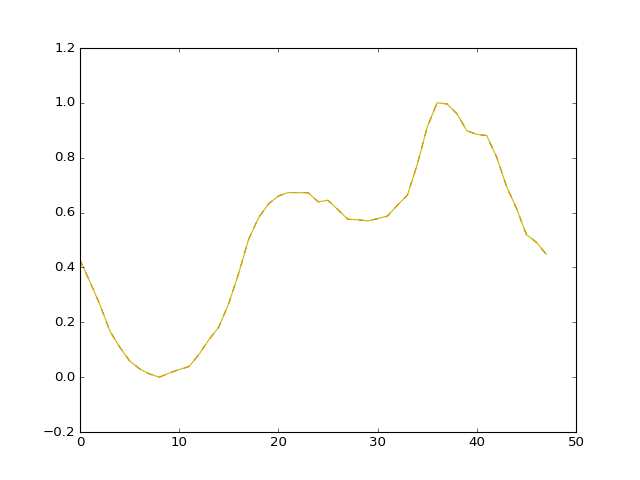

In [21]:
time = np.arange(0, 48, 1)

plt.plot(time, dataset.PreProcessed.Test.target[13], 'r--', 
         time, data[13], 'y')
plt.show()

In [12]:
day=2

dataset.PreProcessed.Test.target[day]-data[day]

array([-7.2719608112947753e-15, -4.3298697960381105e-15,
       2.2204460492503131e-16, -2.5257573810222311e-15,
       -1.0408340855860843e-15, 3.677613769070831e-16,
       -5.134781488891349e-16, -1.9147010366094008e-16,
       1.0061396160665481e-16, -1.2836953722228372e-16,
       -1.3877787807814457e-15, -2.6090241078691179e-15,
       -4.6629367034256575e-15, -6.7168492989821971e-15,
       -8.3266726846886741e-15, -9.9920072216264089e-15,
       -6.3282712403633923e-15, -1.3433698597964394e-14,
       -9.8809849191638932e-15, -6.4392935428259079e-15,
       -1.6431300764452317e-14, -1.1657341758564144e-14,
       -1.1879386363489175e-14, -9.9920072216264089e-15,
       -8.3266726846886741e-15, -6.3282712403633923e-15,
       -1.0103029524088925e-14, -3.6637359812630166e-15,
       -9.7699626167013776e-15, -9.3258734068513149e-15,
       -9.1038288019262836e-15, -7.2164496600635175e-15,
       -1.1546319456101628e-14, -6.8833827526759706e-15,
       -6.2172489379008766e-15, -1.2